In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [2]:
# Load the datasets

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
# Check for missing values in train and test data

df.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

In [4]:
df_test.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64

In [5]:
# Examine the data types of each column in train and test data

df.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

In [6]:
df_test.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
dtype: object

In [7]:
# Analyse summary statistics in train and test data

df.describe(percentiles=[0.01, 0.99])

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
1%,3603.350000,1.180000,1.000000,0.000000,0.000000,0.000000,6.190000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.120000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
99%,356731.650000,15.400000,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,148.870000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [8]:
df_test.describe(percentiles=[0.01, 0.99])

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.00000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,480447.50000,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,69346.83987,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,360336.00000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,362738.23000,1.180000,1.000000,0.000000,0.000000,0.000000,6.180000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,480447.50000,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
99%,598156.77000,15.440000,5.000000,5.000000,5.000000,4.000000,21.800000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,600559.00000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# # Create histogram of the train and test datasets

# df.hist(figsize=(20, 15))
# plt.show()

In [10]:
# df_test.hist(figsize=(20, 15))
# plt.show()

In [11]:
# # Pairplot of entire dataset to observe the correlation between features and also with the target variable

# sns.pairplot(df)
# plt.show()

### OBSERVATIONS

1. No missing values in any of the columns
2. All columns contain numberical values (either floats or ints)
3. Features such store_sales, unit_sales, total_children, num_children_at_home, avg_cars_at_home, gross_weight, units_per_case, store_sqft and target variable cost are continous values while the rest are categorical values
4. id column will probably useless and will be dropped
5. store_sales might contain outliers, but for now I consider the outliers a natural part of the sample data
6. Takes roughly 3m to run the pairplot on my laptop, so comment out after initial analysis
7. Comparing the train and test data, the mean, standard deviations and data distribution of all the features are similar. so the data should be split in train and validation sets to mimic these distributions

In [12]:
# Create bins based on quantiles of the target variables

num_bins = 16
labels = np.arange(1, num_bins+1)
df["cost_bins"] = pd.qcut(df["cost"], q=num_bins, labels=labels)

# Split the training data in train and validation data, maintaining the distribution of the bins
train_train, train_val = train_test_split(df, test_size=0.2, random_state=5, stratify=df["cost_bins"])

# Remove the cost_bins column from the original dataframe
df.drop("cost_bins", axis=1, inplace=True)

In [13]:
# Save the train_train and train_val data to local memory

train_train.to_csv("validation_datas/train.csv", index=False)
train_val.to_csv("validation_datas/val.csv", index=False)

### THE WORK BEGINS!!!

In [14]:
# Load the train and test datasets

train_path = "./train.csv"
test_path = "./test.csv"

df_train = pd.read_csv(train_path)
df_val = pd.read_csv(test_path)

df_train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


### GET BASELINE USING XGBOOST, LIGHTGBM AND CATBOOST

In [15]:
# Separate features and target for train and test data
# Code is setup to either use the stratified train-val split data or the original train-test data provided

try:

    X_train = df_train.drop(["id", "cost", "cost_bins"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop(["id", "cost", "cost_bins"], axis=1)
    y_test = df_val["cost"]

except KeyError:
    X_train = df_train.drop(["id", "cost"], axis=1)
    y_train = df_train["cost"]

    X_test = df_val.drop(["id"], axis=1)


In [16]:
# Perform cross-validation and calculate the RMSLE

def evaluate_model(model, X, y, n_splits=5):
    rmsle_scores = []
    mean_scores = []
    std_scores = []
    mean_store_sales = []
    std_store_sales = []
    mean_store_sqft = []
    std_store_sqft = []
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=5)

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        # Clip predictions to avoid negative values
        y_pred = np.clip(y_pred, 1e-6, np.max(y_pred))

        rmsle = np.sqrt(mean_squared_log_error(y_test_cv, y_pred))
        rmsle_scores.append(rmsle)

        # Calculate the mean and standard deviation for cost, store_sales and store_sqft to see if the splits
        # To see if the splits are representative of original training data
        mean_score = y_train_cv.mean()
        std_score = y_train_cv.std()
        
        mean_scores.append(mean_score)
        std_scores.append(std_score)


        mean_sales = X_train_cv['store_sales(in millions)'].mean()
        std_sales = X_train_cv['store_sales(in millions)'].std()
        mean_sqft = X_train_cv['store_sqft'].mean()
        std_sqft = X_train_cv['store_sqft'].std()

        mean_store_sales.append(mean_sales)
        std_store_sales.append(std_sales)
        mean_store_sqft.append(mean_sqft)
        std_store_sqft.append(std_sqft)
    
    return rmsle_scores, mean_scores, std_scores, mean_store_sales, std_store_sales, mean_store_sqft, std_store_sqft

In [17]:
# Perform cross-validation and calculate the RMSLE on a stratified KFold

def evaluate_model_strat(model, df, X, y, n_splits=5):
    rmsle_scores = []
    mean_scores = []
    std_scores = []
    mean_store_sales = []
    std_store_sales = []
    mean_store_sqft = []
    std_store_sqft = []
    
    # Convert the continous target variable in to bins (classes) using the original data
    num_bins = 16
    labels = np.arange(1, num_bins+1)
    df["cost_bins"] = pd.qcut(df["cost"], q=num_bins, labels=labels)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=5)

    # Get the indices for train and test splits
    for train_index, test_index in skf.split(X, df["cost_bins"]):
        # Split the train and test data
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)

        # Clip predictions to avoid negative values
        y_pred = np.clip(y_pred, 1e-6, np.max(y_pred))

        rmsle = np.sqrt(mean_squared_log_error(y_test_cv, y_pred))
        rmsle_scores.append(rmsle)
        
        # Calculate the mean and standard deviation for cost, store_sales and store_sqft to see if the splits
        # To see if the splits are representative of original training data
        mean_score = y_train_cv.mean()
        std_score = y_train_cv.std()
        
        mean_scores.append(mean_score)
        std_scores.append(std_score)


        mean_sales = X_train_cv['store_sales(in millions)'].mean()
        std_sales = X_train_cv['store_sales(in millions)'].std()
        mean_sqft = X_train_cv['store_sqft'].mean()
        std_sqft = X_train_cv['store_sqft'].std()

        mean_store_sales.append(mean_sales)
        std_store_sales.append(std_sales)
        mean_store_sqft.append(mean_sqft)
        std_store_sqft.append(std_sqft)
    
    return rmsle_scores, mean_scores, std_scores, mean_store_sales, std_store_sales, mean_store_sqft, std_store_sqft

In [18]:
# Initialize the models

models = {
    "LightGBM": lgb.LGBMRegressor(random_state=5),
    "xGBoost": xgb.XGBRegressor(random_state=5),
    "CatBoost": CatBoostRegressor(silent=True, random_state=5),
    # "RandomForest": RandomForestRegressor(random_state=5),
    # "SGDReg": SGDRegressor(random_state=5)
}

In [19]:
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Clip prediction to avoid negative values
#     y_pred = np.clip(y_pred, 0, np.max(y_pred))

#     rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

#     print(f"Model: {name}")
#     print(f"RMSLE: {rmsle}")
#     try:
#         plt.plot(model.feature_importances_, label=name)
#         plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
#         plt.legend()
    
#     except AttributeError: # Incase the model does not have 'feature_importances_'
#         pass
#     print()

### OBSERVATIONS - BASELINE AFTER STRATIFYING SPLIT DATA INTO TRAIN AND VALIDATION

1. Baseline LightGBM RMSLE is 0.303294
2. Baseline xGBoost RMSLE is 0.302591
3. Baseline CatBoost RMSLE is 0.302491
4. Baseline Random Forest RMSLE is 0.310002
5. Baseline SGD RMSLE is 28.623026

CatBoost performed the best on baseline data before feature engineering and data pre-processing

6. Plotting feature importance, the most noticeable peaks in the LightGBM model which shows in order of importance store_sqft, total_children, avg_cars_at_home
7. Plotting feature importance, the most noticeable peaks in the xGBoost model which shows in order of importance florist, store_sqft, video_store
8. Plotting feature importance, the most noticeable peaks in the CatBoost model which shows in order of importance store_sqft, total_children, avg_cars_at_home
9. Plotting feature importance, the most noticeable peaks in the Random Forest model which shows in order of importance store_sales, gross_weight, units_per_case
10. SGD Regressor does not have feature importance

Model: LightGBM
RMSLE Scores: [0.30378394665052805, 0.301994111790199, 0.3026749179331034, 0.3036953368935455, 0.30355815793977065]
Store Sales Mean: [6.335144206086005, 6.336462332057905, 6.339391367091155, 6.336183529966801, 6.339700245257035]
Std Deviation Sales: [3.3043907057590514, 3.3083036110023505, 3.310513997693563, 3.3096157385609124, 3.3070738981200023]
Store Size Mean: [28180.794021535516, 28181.21033132248, 28181.129812779036, 28184.577561236205, 28173.955482552756]
Std. Deviation Store Size: [5970.153331929363, 5967.280364954422, 5966.891331187245, 5969.162904981711, 5970.886715523829]
Cost Mean: [99.63595359179651, 99.61537345326762, 99.59542600834635, 99.5964120318175, 99.63048194568266]
Std. Deviation Cost: [29.9380539012494, 29.9664327929694, 29.944889782822344, 29.91717204056349, 29.930630333271832]
Average RMSLE: 0.303141
Std. Deviation: 0.000697

Model: xGBoost
RMSLE Scores: [0.30328420667251815, 0.3007137963973537, 0.30193327812092197, 0.3033724387206774, 0.303007

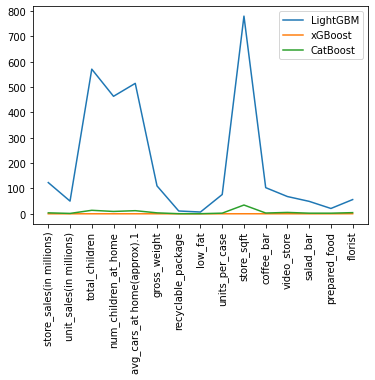

In [20]:
for name, model in models.items():
    rmsle_scores, mean_scores, std_scores, mean_store_sales, std_store_sales, mean_store_sqft, std_store_sqft = evaluate_model(model, X_train, y_train)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Store Sales Mean: {mean_store_sales}")
    print(f"Std Deviation Sales: {std_store_sales}")
    print(f"Store Size Mean: {mean_store_sqft}")
    print(f"Std. Deviation Store Size: {std_store_sqft}")
    print(f"Cost Mean: {mean_scores}")
    print(f"Std. Deviation Cost: {std_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have 'feature_importances_'
        pass
    print()

### OBSERVATION - USE TRAIN DATA TO CROSS VALIDATE WITH K-FOLD AND SEE THE RMSLE SCORES PER FOLD AND MEAN RMSLE
### TRYING CV FOR 5 AND 10 FOLDS THEN SETTLING ON EITHER

##### 5 FOLDS
1. LightGBM mean RMSLE is 0.303141, Standard deviation of 0.000697
2. xGBoost mean RMSLE is 0.302462, Standard deviation of 0.001014
3. CatBoost mean RMSLE is 0.302058, Standard deviation of 0.000941
4. Random Forest mean RMSLE is 0.309548, Standard deviation of 0.000935

CatBoost performed the best on training data that is cross validated with 5 folds

I think I will abandon using Random Forest and SGD Regressor for now since their scores are not better than the other 3 and they so long to run.

Run time ~ 5 minutes

Model: LightGBM
RMSLE Scores: [0.3035702528051104, 0.30306429132409435, 0.30158748036942795, 0.30185832237535554, 0.30335859599209386, 0.30211542518870566, 0.3035800361621135, 0.30409113086724365, 0.3036108454878758, 0.3034856329458055]
Store Sales Mean: [6.338231154911162, 6.334537406491481, 6.339017613212375, 6.334919951156637, 6.338174417672418, 6.338379689301947, 6.337722623595834, 6.335964052136427, 6.3381374517041165, 6.338679013145115]
Std Deviation Sales: [3.3089486601980242, 3.303818777528412, 3.307780167962729, 3.3084706075475068, 3.3095550552405273, 3.308661643879144, 3.310052053855695, 3.307357293313166, 3.3086280281088705, 3.3065213362806034]
Store Size Mean: [28182.38578238802, 28178.690504529728, 28178.916987869332, 28182.493845243014, 28179.265928054716, 28182.13809658898, 28187.951388053763, 28176.47678868219, 28179.25815364027, 28175.756946435893]
Std. Deviation Store Size: [5966.9288082050525, 5971.954902030996, 5967.982702540713, 5968.32335699814, 5967.496984455938,

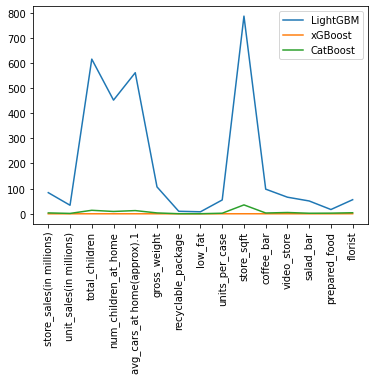

In [22]:
for name, model in models.items():
    rmsle_scores, mean_scores, std_scores, mean_store_sales, std_store_sales, mean_store_sqft, std_store_sqft = evaluate_model(model, X_train, y_train, n_splits=10)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Store Sales Mean: {mean_store_sales}")
    print(f"Std Deviation Sales: {std_store_sales}")
    print(f"Store Size Mean: {mean_store_sqft}")
    print(f"Std. Deviation Store Size: {std_store_sqft}")
    print(f"Cost Mean: {mean_scores}")
    print(f"Std. Deviation Cost: {std_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have 'feature_importances_'
        pass
    print()


##### 10 FOLDS
1. LightGBM mean RMSLE is 0.303032, Standard deviation of 0.000816
2. xGBoost mean RMSLE is 0.302015, Standard deviation of 0.001005
3. CatBoost mean RMSLE is 0.301856, Standard deviation of 0.000998

CatBoost performed the best on training data that is cross validated with 10 folds

Run time ~ 8 minutes

Model: LightGBM
RMSLE Scores: [0.3035814546729896, 0.3032297725587379, 0.3025565164649779, 0.30298840292873686, 0.30335612968381626]
Store Sales Mean: [6.332507250197732, 6.337169241229546, 6.345272436508956, 6.336717579760571, 6.335215163614542]
Std Deviation Sales: [3.3069509617027792, 3.3048305130621816, 3.3095667081750735, 3.3113514479101207, 3.307186677201327]
Store Size Mean: [28178.45542689442, 28180.677093270522, 28177.660480315262, 28185.88621044927, 28178.987990383983]
Std. Deviation Store Size: [5973.140613551829, 5966.786972325711, 5970.9108603273025, 5966.491706754731, 5967.0439516067]
Cost Mean: [99.61514108399126, 99.61481401052488, 99.61234149353554, 99.61492831348497, 99.61642205717578]
Std. Deviation Cost: [29.93850680432538, 29.94087170364729, 29.94024305272803, 29.93859864219803, 29.939004202034273]
Average RMSLE: 0.303142
Std. Deviation: 0.000350

Model: xGBoost
RMSLE Scores: [0.30280943648227454, 0.30249609005019906, 0.3015958554364774, 0.3025276052254535, 0.30245

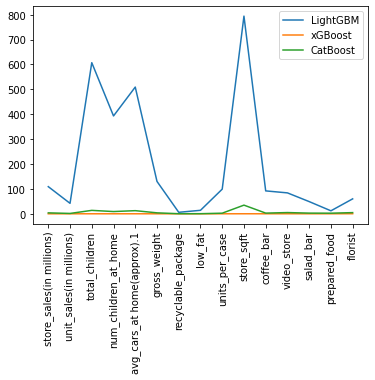

In [23]:
for name, model in models.items():
    rmsle_scores, mean_scores, std_scores, mean_store_sales, std_store_sales, mean_store_sqft, std_store_sqft = evaluate_model_strat(model, df_train, X_train, y_train)
    mean_rmsle = np.mean(rmsle_scores)
    std = np.std(rmsle_scores)

    print(f"Model: {name}")
    print(f"RMSLE Scores: {rmsle_scores}")
    print(f"Store Sales Mean: {mean_store_sales}")
    print(f"Std Deviation Sales: {std_store_sales}")
    print(f"Store Size Mean: {mean_store_sqft}")
    print(f"Std. Deviation Store Size: {std_store_sqft}")
    print(f"Cost Mean: {mean_scores}")
    print(f"Std. Deviation Cost: {std_scores}")
    print(f"Average RMSLE: {mean_rmsle:.6f}")
    print(f"Std. Deviation: {std:.6f}")
    try:
        plt.plot(model.feature_importances_, label=name)
        plt.xticks(np.arange(X_train.shape[1]), X_train.columns.tolist(), rotation=90)
        plt.legend()
    
    except AttributeError: #Incase the model does not have 'feature_importances_'
        pass
    print()

### OBSERVATION - CHECKING IF STRATIFIED KFOLD ON TARGET VARIABLE WILL GIVE BETTER RESULTS

##### 5 FOLDS
1. LightGBM mean RMSLE is 0.303142, Standard deviation of 0.000350
2. xGBoost mean RMSLE is 0.302376, Standard deviation of 0.000410
3. CatBoost mean RMSLE is 0.302054, Standard deviation of 0.000371

CatBoost performed the best on training data that is cross validated with 5 folds

The improvements are extremely minimal and adds no additional value in running this

Run time ~ 5 minutes